In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# load the data
oecd_bli = pd.read_csv('datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('datasets/lifesat/gdp_per_capita.csv', thousands=',',
                             delimiter='\t', encoding='latin1', na_values="n/a")

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
# prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

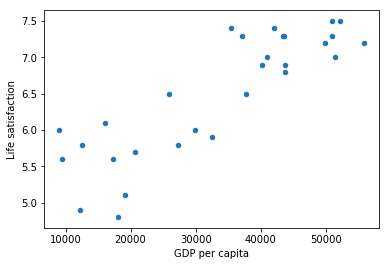

In [5]:
# visualize the data
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [6]:
# select a linear model
model = sklearn.linear_model.LinearRegression()

In [7]:
# train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# make a prediction for Cyprus
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


# Execises

1. How would you define Machine Learning?

Ans: Machine learning is the field study that makes computers learn from the surrounding environment (data) so it gains knowledge that continuously growing

2. Can you name four types of problems where it shines?

Ans: The solutions require a lot of hand-tuning or long list of rules, complex problems for which there is no good solution at all using a traditional approach, fluctuating environments, getting insights about complex problems and large amounts of data.

3. What is a labeled training set?

Ans: Labeled training set is a training set that contains the desired solution.

4. What are the two most common supervised tasks?

Ans: Classification and Regression

5. Can you name four common unsupervised tasks?

Ans: Clustering, visualization, dimensionality reduction, and association rule learning.

6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

Ans: Reinforcement Learning is the best possible solution because it is the type of learning that learn from the various unknown condition.

7. What type of algorithm would you use to segment your customers into multiple groups?

Ans: The best possible answer is using a clustering algorithm that can group up similar data.

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

Ans: supervised learning, because in spam detection you need to feed data with the desired solution (labels) into algorithms

9. What is an online learning system?

Ans: An online learning system can learn incrementally, it is capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.

10. What is out-of-core learning?

Ans: Out-of-core learning handles vast quantities of data that cannot fit in a computer's main memory by chops the data into mini-batches.

11. What type of learning algorithm relies on a similarity measure to make predictions?

Ans: Instance-based learning learns the training data by heart; it uses similarity to measure new data with the most similar learned instances.

12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?

Ans: A model has one or more model parameters that determine what it will predict given a new instance. A learning algorithm tries to find optimal values for these parameters such that model generalizes well to new instances. 

13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

Ans: Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. The strategy by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model regularized. To make predictions, we feed new instances's features into the model's prediction function, using the parameter values found by learning algorithm.

14. Can you name four of the main challenges in Machine Learning?

Ans: The lack of data, poor data quality, nonrepresentative data, uninformative features, simple models that underfit the training data, complex models that overfit the data.

15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

Ans: The model is overfitting the training data. Possible solutions are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.

16. What is a test set and why would you want to use it?

Ans: A test set is used to estime the generalization error that a model will make on new instances.

17. What is the purpose of a validation set?

Ans: A validation set is used to compare models by tuning the best hyperparameters.

18. What can go wrong if you tune hyperparameters using the test set?

Ans: It will overfitting the test set, and generalization error will be optimistic..

19. What is cross-validation and why would you prefer it to a validation set?

Ans: Cross-validation is a technique to compare models for model selection and hyperparameter tuning without the need for a separate validation set.